In [83]:
using DataFrames, CSV, Polynomials, GLM, Unitful, Statistics, Plots

include("../multi_fractals.jl");

In [84]:
using Random, Distributions

function generate_multifractal_ts(length_ts, cascade_steps, distribution)
    ts = rand(length_ts)  # Start with a normal random time series
    for step in 1:cascade_steps
        segment_length = max(length_ts ÷ 2^step, 1)
        for i in 1:segment_length:length_ts
            multiplier = rand(distribution)
            ts[i:min(i+segment_length-1, length_ts)] .*= multiplier
        end
    end
    return ts
end

# Parameters
length_ts = 1000
cascade_steps = 10
distribution = LogNormal(0, 0.5)  # Example distribution

# Generate the time series
ts = generate_multifractal_ts(length_ts, cascade_steps, distribution)


1000-element Vector{Float64}:
 0.10430566191191211
 0.00020123259575565764
 1.9762657411079818
 0.32920310741410086
 3.4284946838853037
 3.945216127096884
 0.07342782728406887
 0.4674410576472451
 1.6246369483049694
 0.5880691247790253
 ⋮
 0.25864485707242874
 0.10934770932574062
 0.04597008239048429
 0.015898999173123585
 0.0476926212505833
 0.010207433951904826
 0.01317455679420243
 0.009093787712698163
 0.12581925034269947

## Chhabra Jensen method

In [85]:
# parameters
qValues = [-15:15;]
scales = [2:8;]

7-element Vector{Int64}:
 2
 3
 4
 5
 6
 7
 8

In [86]:

cj_results = ChhabraJensen(ts, qValues, scales; plot = true)

Dict{String, Any} with 9 entries:
  "alpha"       => [2.01619, 2.01637, 2.01666, 2.01707, 2.01767, 2.01851, 2.019…
  "Rsqr_Dq"     => [0.977028, 0.977156, 0.977313, 0.977508, 0.977755, 0.978073,…
  "Rsqr_alpha"  => [0.975251, 0.97513, 0.974982, 0.974802, 0.97458, 0.9743, 0.9…
  "falpha"      => [0.00427321, 0.00156371, -0.0022351, -0.00739734, -0.0142291…
  "plot"        => Plot{Plots.GRBackend() n=2}
  "Rsqr_falpha" => [0.000447968, 5.45676e-5, 9.98866e-5, 0.000965192, 0.0031026…
  "q"           => [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6  …  6, 7, 8, 9…
  "mfw"         => 1.4861
  "Dq"          => [1.89044, 1.88205, 1.87245, 1.86134, 1.84834, 1.83291, 1.814…

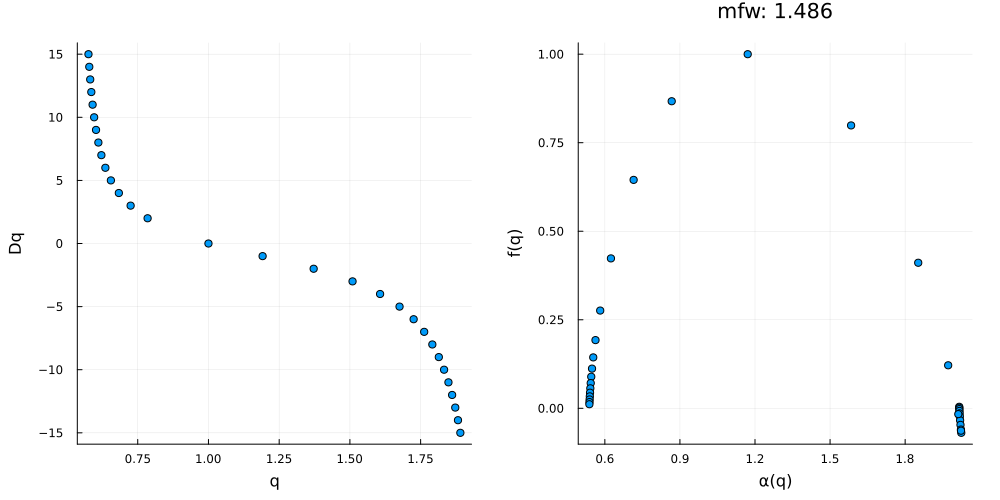

In [87]:
cj_results["plot"] |> display

## MFDFA

In [88]:
q = LinRange(-15,15,31)
exponents = LinRange(2,8,7)
scale = round.(2 .^exponents)
m = 1

mfdfa_results = mfdfa(ts, scale, q, m; plot = true)

Dict{String, Any} with 9 entries:
  "Hq_r2"     => [0.98966, 0.989599, 0.989527, 0.989438, 0.989329, 0.989194, 0.…
  "hq"        => [1.88656, 1.88625, 1.88579, 1.88508, 1.88401, 1.88241, 1.88001…
  "diag_plot" => Plot{Plots.GRBackend() n=2}
  "Fq"        => [0.00377268 0.0260863 … 3.50507 8.74054; 0.00387123 0.0265898 …
  "Hq"        => [1.81955, 1.81477, 1.80927, 1.80289, 1.79542, 1.78656, 1.77591…
  "q"         => LinRange{Float64}(-15.0, 15.0, 31)
  "mfw"       => 1.44084
  "tq"        => [-28.2933, -26.4067, -24.5205, -22.6347, -20.7496, -18.8656, -…
  "Dq"        => [-0.00504768, -0.000822202, 0.00524793, 0.0137658, 0.0255189, …

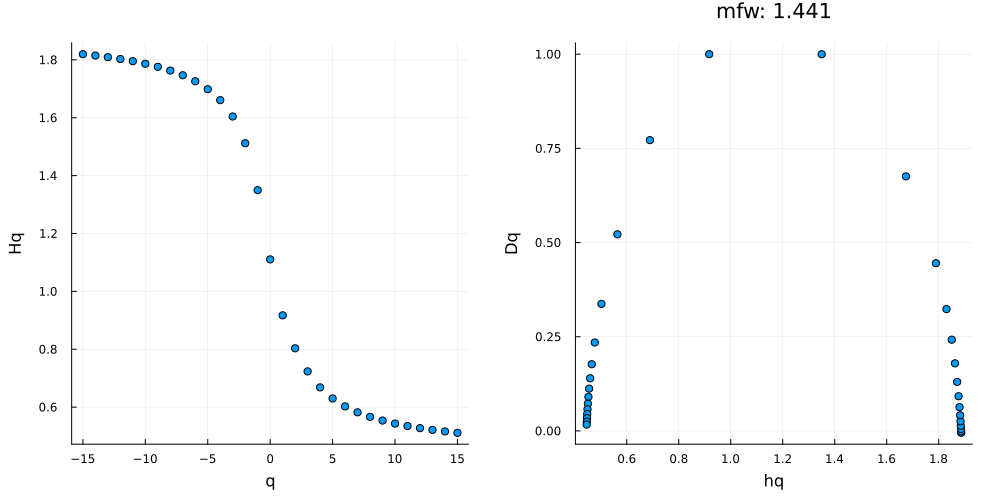

In [89]:
mfdfa_results["diag_plot"] |> display